In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Ensuring arrival_date is imported as datetime type
df = pd.read_csv('hotel_bookings_clean.csv', parse_dates=['arrival_date'])



## Check types (having a issue with date_arrival)

In [12]:
print("=== Data Types for Each Column ===")
print(df.dtypes)
print("\n=== Detailed DataFrame Information ===")
df.info()

=== Data Types for Each Column ===
hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_month                        object
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
market_segment                            object
distribution_channel                      object
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled              bool
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                             

# Studying ADR vs ("is_cancelled" , "arrival_date-month", "market_segment", "distribution_channel", "deposit_type", "customer_type")


Overall Average Daily Rate: $103.65

=== ADR by is_canceled ===
True:
  Average ADR: $105.39 (1.68% from overall)
  Median ADR: $97.00
  Range: $0.50 to $450.00
  Count: 44114.0 bookings
False:
  Average ADR: $102.61 (-1.0% from overall)
  Median ADR: $95.00
  Range: $0.26 to $510.00
  Count: 73973.0 bookings

=== ADR by market_segment ===
Direct:
  Average ADR: $118.11 (13.95% from overall)
  Median ADR: $107.00
  Range: $2.00 to $451.50
  Count: 12291.0 bookings
Online TA:
  Average ADR: $118.03 (13.87% from overall)
  Median ADR: $110.00
  Range: $0.50 to $450.00
  Count: 56055.0 bookings
Aviation:
  Average ADR: $102.74 (-0.88% from overall)
  Median ADR: $95.00
  Range: $79.00 to $193.50
  Count: 231.0 bookings
Complementary:
  Average ADR: $96.62 (-6.78% from overall)
  Median ADR: $102.69
  Range: $1.00 to $170.00
  Count: 713.0 bookings
Offline TA/TO:
  Average ADR: $88.52 (-14.6% from overall)
  Median ADR: $87.00
  Range: $1.00 to $510.00
  Count: 23991.0 bookings
Groups:
  A

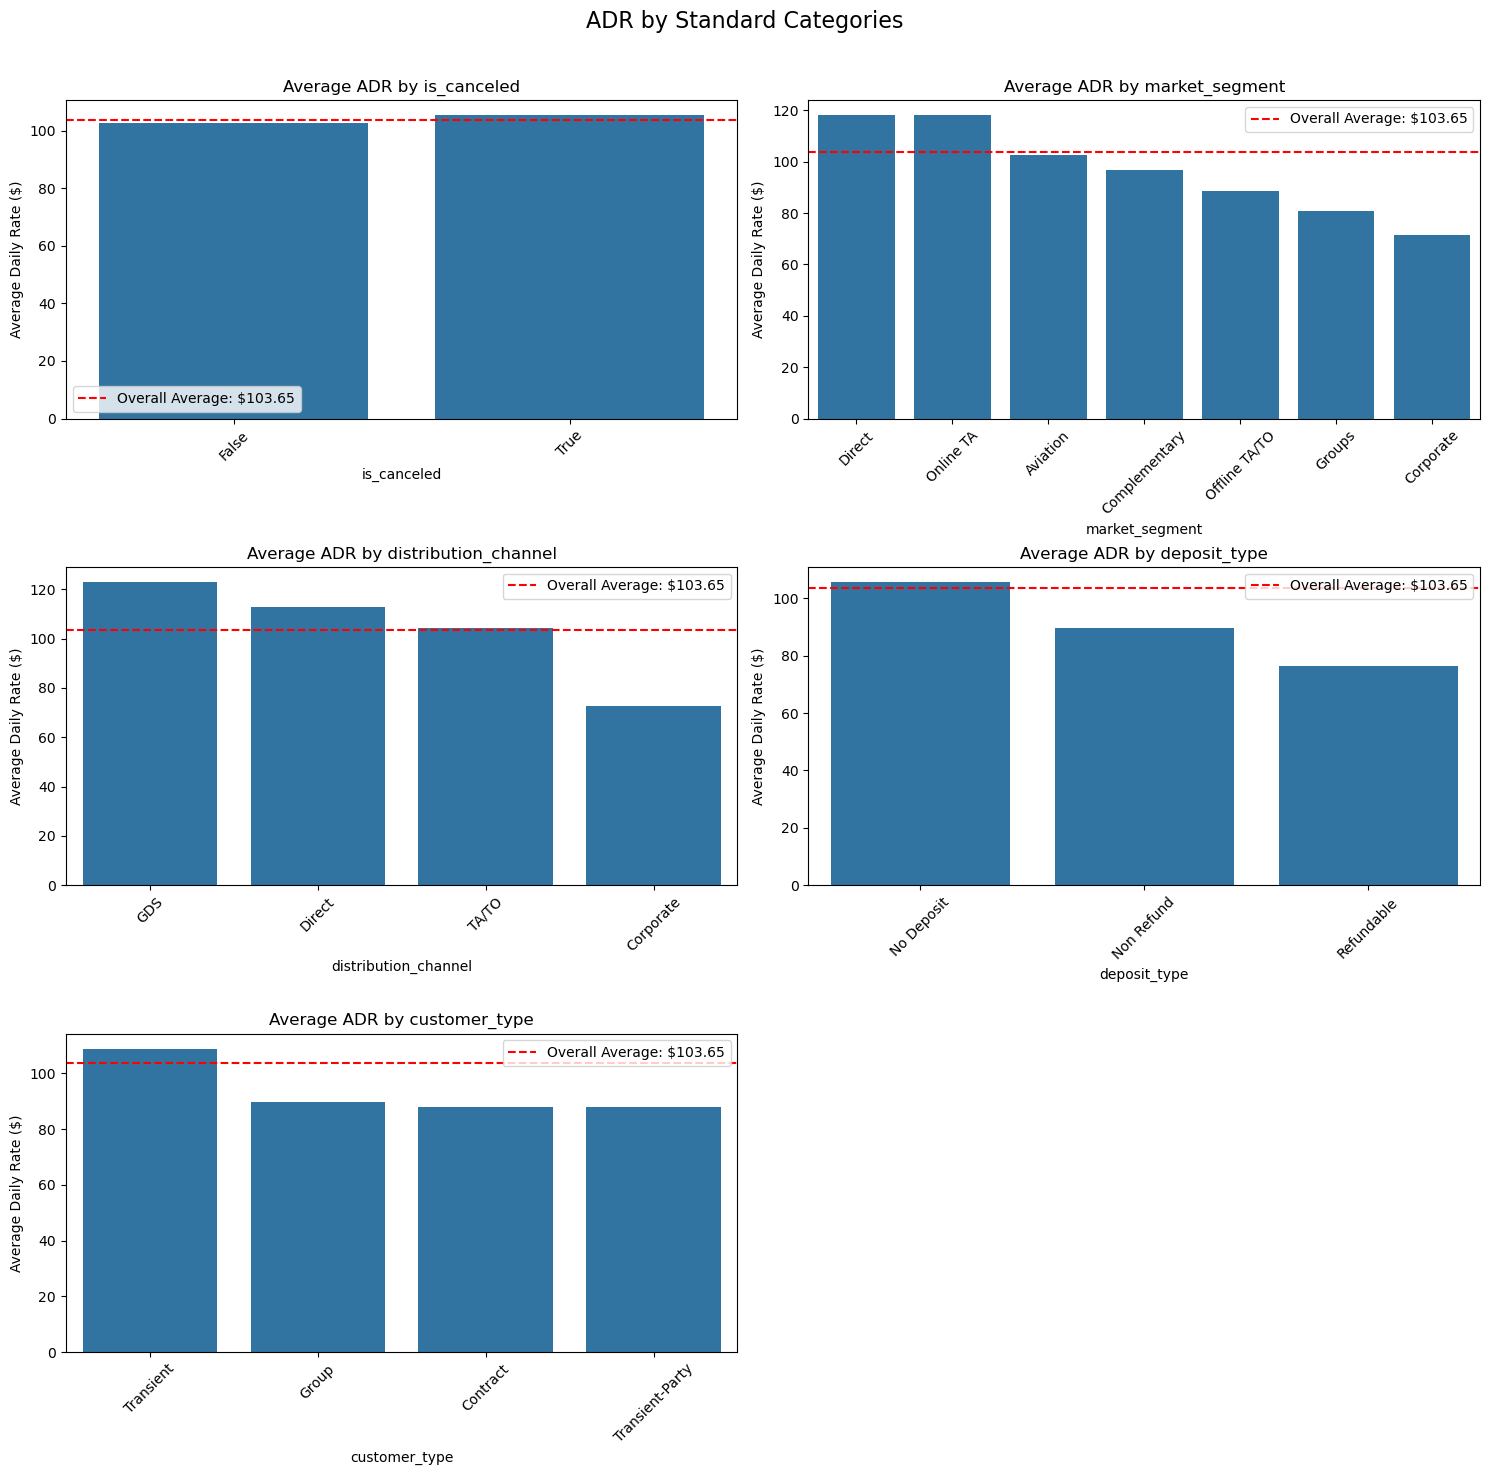


=== ADR by month ===
January:
  Average ADR: $72.57 (-29.99% from overall)
  Median ADR: $72.00
  Range: $1.00 to $284.20
  Count: 5816.0 bookings
February:
  Average ADR: $75.44 (-27.21% from overall)
  Median ADR: $75.00
  Range: $0.50 to $284.20
  Count: 7944.0 bookings
March:
  Average ADR: $81.81 (-21.07% from overall)
  Median ADR: $80.00
  Range: $0.26 to $285.00
  Count: 9661.0 bookings
April:
  Average ADR: $101.81 (-1.78% from overall)
  Median ADR: $98.00
  Range: $3.00 to $336.00
  Count: 11005.0 bookings
May:
  Average ADR: $110.37 (6.48% from overall)
  Median ADR: $108.00
  Range: $2.00 to $510.00
  Count: 11692.0 bookings
June:
  Average ADR: $117.91 (13.76% from overall)
  Median ADR: $115.00
  Range: $4.00 to $333.67
  Count: 10879.0 bookings
July:
  Average ADR: $128.36 (23.84% from overall)
  Median ADR: $118.80
  Range: $1.80 to $508.00
  Count: 12553.0 bookings
August:
  Average ADR: $141.54 (36.56% from overall)
  Median ADR: $130.50
  Range: $1.56 to $450.00
  

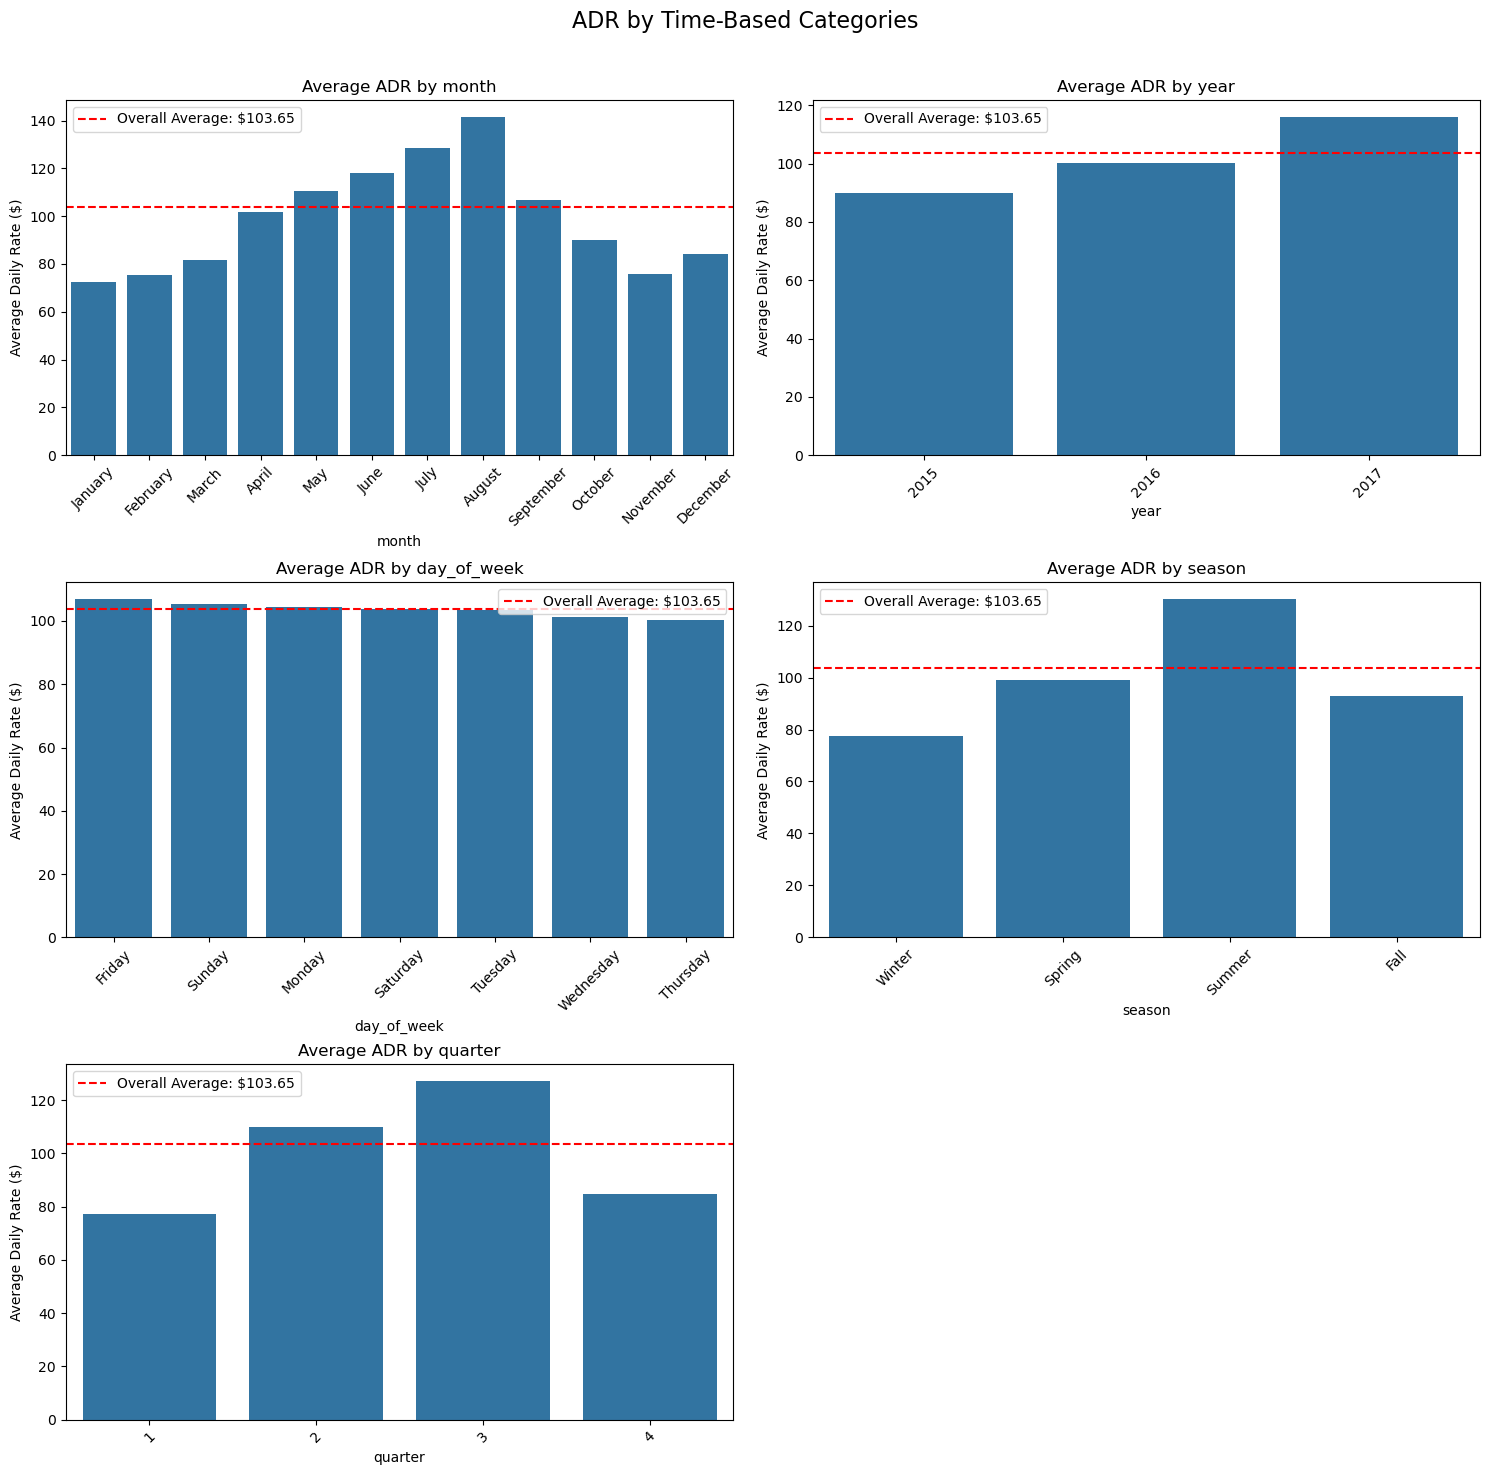

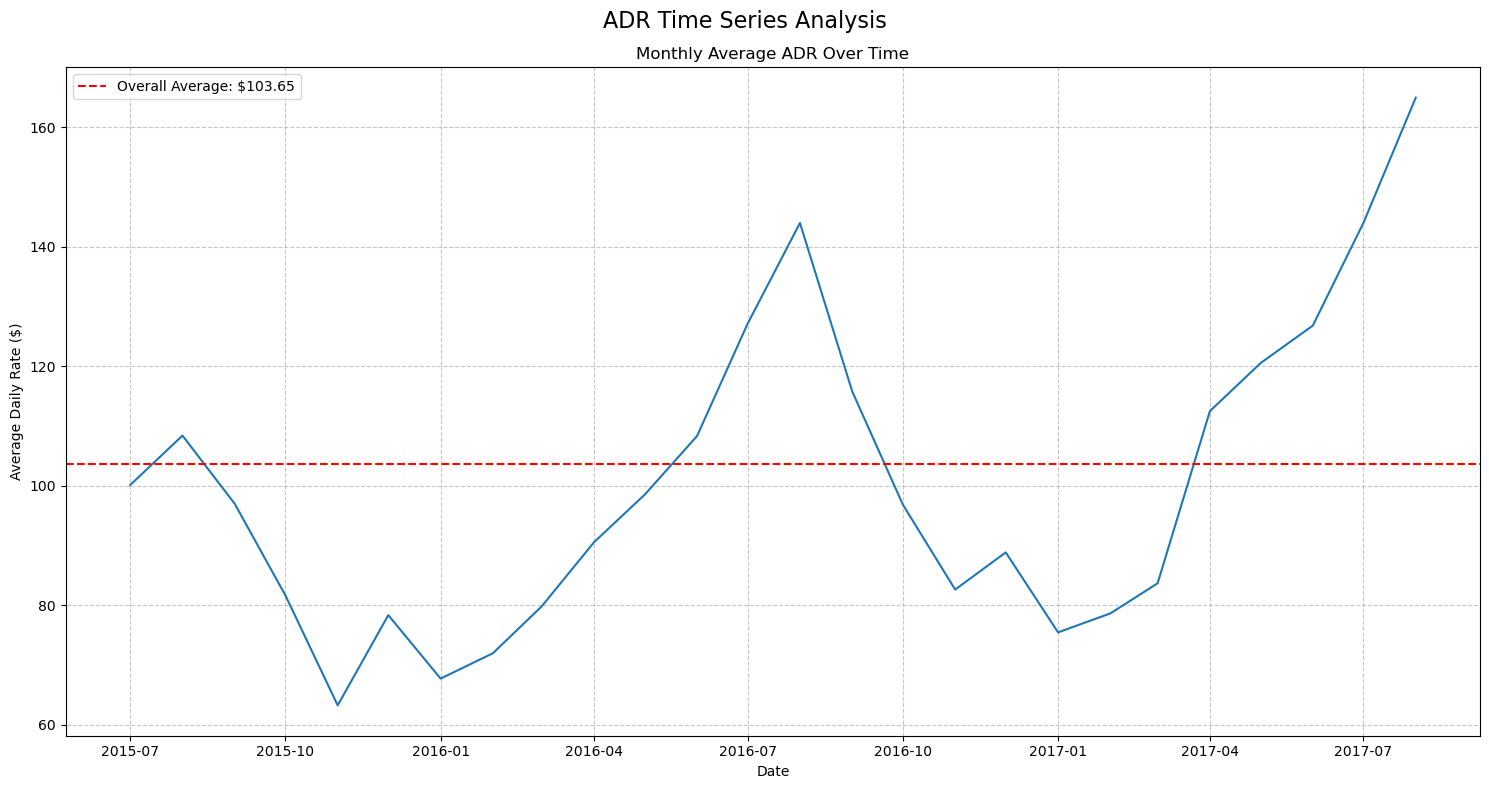


=== Statistical Significance (ANOVA) ===
is_canceled:
  F-statistic: 99.24
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
market_segment:
  F-statistic: 3171.77
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
distribution_channel:
  F-statistic: 1195.45
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
deposit_type:
  F-statistic: 802.64
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
customer_type:
  F-statistic: 1563.17
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
month:
  F-statistic: 3063.51
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
year:
  F-statistic: 2653.78
  p-value: 0.0000000000
  Result: Statistically significant difference in ADR between categories
day_of_week:
  F-statistic: 

In [19]:
# Calculate the overall average for the ADR column
overall_adr_avg = df['adr'].mean()
print(f"Overall Average Daily Rate: ${overall_adr_avg:.2f}")

# Extract various date components for analysis
df['month'] = df['arrival_date'].dt.month_name()
df['year'] = df['arrival_date'].dt.year
df['day_of_week'] = df['arrival_date'].dt.day_name()
df['quarter'] = df['arrival_date'].dt.quarter

# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['arrival_date'].dt.month.apply(get_season)

# Create a function to compare ADR with a categorical column
def compare_adr_with_column(column_name):
    print(f"\n=== ADR by {column_name} ===")
    
    # Group by the column and calculate statistics for ADR
    grouped = df.groupby(column_name)['adr'].agg(['mean', 'median', 'count', 'min', 'max'])
    
    # Sort by categories for time-based columns to maintain chronological order
    if column_name in ['month', 'year', 'quarter', 'season']:
        if column_name == 'month':
            # Sort months chronologically
            month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                           'July', 'August', 'September', 'October', 'November', 'December']
            grouped = grouped.reindex(month_order)
        elif column_name == 'season':
            # Sort seasons chronologically
            season_order = ['Winter', 'Spring', 'Summer', 'Fall']
            grouped = grouped.reindex(season_order)
        elif column_name == 'day_of_week':
            # Sort days of week chronologically
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            grouped = grouped.reindex(day_order)
        else:
            # For year and quarter, sort numerically
            grouped = grouped.sort_index()
    else:
        # For non-time columns, sort by mean ADR
        grouped = grouped.sort_values('mean', ascending=False)
    
    # Calculate percentage difference from overall average
    grouped['diff_from_avg'] = ((grouped['mean'] - overall_adr_avg) / overall_adr_avg * 100).round(2)
    
    # Format the statistics
    for category, stats in grouped.iterrows():
        print(f"{category}:")
        print(f"  Average ADR: ${stats['mean']:.2f} ({stats['diff_from_avg']}% from overall)")
        print(f"  Median ADR: ${stats['median']:.2f}")
        print(f"  Range: ${stats['min']:.2f} to ${stats['max']:.2f}")
        print(f"  Count: {stats['count']} bookings")
    
    return grouped

# Compare ADR with standard categories
standard_columns = [
    'is_canceled',
    'market_segment', 
    'distribution_channel', 
    'deposit_type', 
    'customer_type'
]

# Time-based columns for comparison
time_columns = [
    'month',
    'year',
    'day_of_week',
    'season',
    'quarter'
]

# Create visualizations for standard categories
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.suptitle('ADR by Standard Categories', fontsize=16)

for i, column in enumerate(standard_columns):
    # Create subplot
    plt.subplot(3, 2, i+1)
    
    # Get the data
    grouped_data = compare_adr_with_column(column)
    
    # Create bar plot
    sns.barplot(x=grouped_data.index, y=grouped_data['mean'])
    plt.title(f'Average ADR by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Daily Rate ($)')
    plt.xticks(rotation=45)
    
    # Add horizontal line for overall average
    plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Create visualizations for time-based categories
plt.figure(figsize=(15, 15))
plt.suptitle('ADR by Time-Based Categories', fontsize=16)

for i, column in enumerate(time_columns):
    # Create subplot
    plt.subplot(3, 2, i+1)
    
    # Get the data
    grouped_data = compare_adr_with_column(column)
    
    # Create bar plot
    sns.barplot(x=grouped_data.index, y=grouped_data['mean'])
    plt.title(f'Average ADR by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Daily Rate ($)')
    plt.xticks(rotation=45)
    
    # Add horizontal line for overall average
    plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Time series analysis of ADR trends
plt.figure(figsize=(15, 8))
plt.suptitle('ADR Time Series Analysis', fontsize=16)

# Monthly ADR time series - Fixed to avoid creating a duplicate column
# Group by year and month, then calculate average ADR
monthly_adr = df.groupby([df['year'], df['month']])['adr'].mean().reset_index()

# Create date strings for plotting
monthly_adr['month_num'] = monthly_adr['month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})
monthly_adr['date_str'] = monthly_adr['year'].astype(str) + '-' + monthly_adr['month_num'].astype(str).str.zfill(2)
monthly_adr['date'] = pd.to_datetime(monthly_adr['date_str'])
monthly_adr = monthly_adr.sort_values('date')

plt.plot(monthly_adr['date'], monthly_adr['adr'])
plt.title('Monthly Average ADR Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Statistical analysis: ANOVA test for each categorical variable
from scipy.stats import f_oneway

print("\n=== Statistical Significance (ANOVA) ===")
for column in standard_columns + time_columns:
    # Get unique categories
    categories = df[column].unique()
    
    # Create groups of ADR values for each category
    groups = [df[df[column] == category]['adr'].dropna() for category in categories]
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*groups)
    
    print(f"{column}:")
    print(f"  F-statistic: {f_stat:.2f}")
    print(f"  p-value: {p_value:.10f}")
    if p_value < 0.05:
        print("  Result: Statistically significant difference in ADR between categories")
    else:
        print("  Result: No statistically significant difference in ADR between categories")

## Inside : Refundable vs cancelations. 

=== Analysis of Refundable Bookings and Cancellations ===

Total Refundable Bookings: 162


,Count,Percentage
Not Canceled,126,77.78%
Canceled,36,22.22%


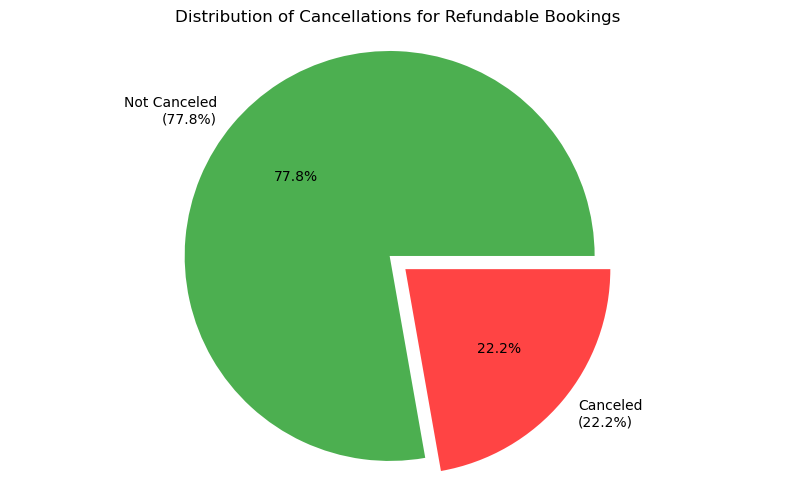


=== Comparison with Overall Cancellation Rate ===
Refundable Bookings Cancellation Rate: 22.22%
Overall Cancellation Rate: 37.36%
Difference: -15.14 percentage points


In [25]:
# Create a cross-tabulation of deposit_type 'Refundable' and is_canceled
refundable_cancellations = pd.crosstab(
    df[df['deposit_type'] == 'Refundable']['is_canceled'],
    df[df['deposit_type'] == 'Refundable']['deposit_type'],
    normalize='columns'
) * 100

# Get the total number of refundable bookings
total_refundable = len(df[df['deposit_type'] == 'Refundable'])

# Create a detailed analysis
print("=== Analysis of Refundable Bookings and Cancellations ===\n")
print(f"Total Refundable Bookings: {total_refundable}")

# Get the counts and percentages
cancellation_counts = df[df['deposit_type'] == 'Refundable']['is_canceled'].value_counts()
cancellation_percentages = cancellation_counts / total_refundable * 100

# Create a DataFrame for better visualization
analysis_df = pd.DataFrame({
    'Count': cancellation_counts,
    'Percentage': cancellation_percentages.round(2)
})
analysis_df.index = ['Not Canceled', 'Canceled']

# Display the styled results
styled_analysis = analysis_df.style\
    .set_properties(**{
        'background-color': '#000000',
        'color': '#ffffff',
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]}
    ])\
    .format({'Percentage': '{:.2f}%'})

# Create a visualization
plt.figure(figsize=(10, 6))
plt.pie(analysis_df['Count'], 
        labels=[f'{idx}\n({row["Percentage"]:.1f}%)' for idx, row in analysis_df.iterrows()],
        autopct='%1.1f%%',
        colors=['#4CAF50', '#ff4444'],
        explode=(0, 0.1))
plt.title('Distribution of Cancellations for Refundable Bookings')
plt.axis('equal')

# Display both the table and the plot
display(styled_analysis)
plt.show()

# Compare with overall cancellation rate
total_cancellation_rate = (df['is_canceled'].mean() * 100).round(2)
refundable_cancellation_rate = (df[df['deposit_type'] == 'Refundable']['is_canceled'].mean() * 100).round(2)

print("\n=== Comparison with Overall Cancellation Rate ===")
print(f"Refundable Bookings Cancellation Rate: {refundable_cancellation_rate}%")
print(f"Overall Cancellation Rate: {total_cancellation_rate}%")
print(f"Difference: {(refundable_cancellation_rate - total_cancellation_rate):.2f} percentage points")

## Comparing hotel type with ADR and cross comparing by seasons. 

=== ADR Analysis by Hotel Type and Season ===

1. Overall ADR by Hotel Type


,Average ADR,Number of Bookings,Standard Deviation
hotel,,,
City Hotel,$106.85,78878,$37.18
Resort Hotel,$97.21,39209,$60.37


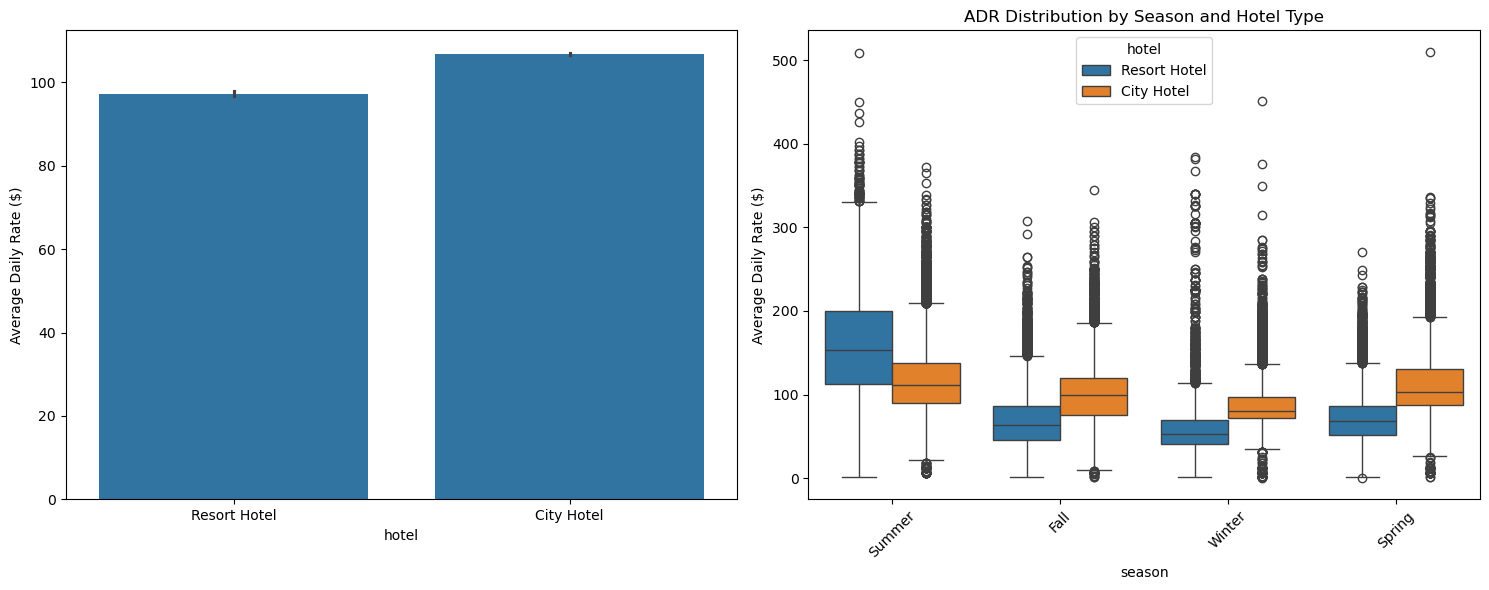


2. Seasonal ADR Analysis



3. Key Findings:

Resort Hotel:
• Highest ADR: Summer ($158.52)
• Lowest ADR: Winter ($60.63)
• Seasonal variation: 161.46%

City Hotel:
• Highest ADR: Summer ($116.13)
• Lowest ADR: Winter ($87.71)
• Seasonal variation: 32.4%


In [27]:
# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season column based on arrival_date
df['season'] = df['arrival_date'].dt.month.apply(get_season)

# Calculate overall statistics
print("=== ADR Analysis by Hotel Type and Season ===\n")

# 1. Overall ADR by Hotel Type
hotel_adr = df.groupby('hotel')['adr'].agg(['mean', 'count', 'std']).round(2)
hotel_adr.columns = ['Average ADR', 'Number of Bookings', 'Standard Deviation']

# 2. ADR by Hotel Type and Season
hotel_season_adr = df.pivot_table(
    values='adr',
    index='hotel',
    columns='season',
    aggfunc=['mean', 'count', 'std']
).round(2)

# Reshape and rename columns for better presentation
hotel_season_stats = pd.DataFrame()
for stat in ['mean', 'count', 'std']:
    stat_df = hotel_season_adr[stat]
    stat_df.columns = [f'{season} ({stat})' for season in stat_df.columns]
    hotel_season_stats = pd.concat([hotel_season_stats, stat_df], axis=1)

# Sort columns by season and statistic
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
col_order = []
for season in season_order:
    col_order.extend([f'{season} (mean)', f'{season} (count)', f'{season} (std)'])
hotel_season_stats = hotel_season_stats[col_order]

# Display styled tables
print("1. Overall ADR by Hotel Type")
styled_hotel_adr = hotel_adr.style\
    .set_properties(**{
        'background-color': '#000000',
        'color': '#ffffff',
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]}
    ])\
    .format({
        'Average ADR': '${:.2f}',
        'Standard Deviation': '${:.2f}'
    })

display(styled_hotel_adr)

# Create visualizations
plt.figure(figsize=(15, 6))

# 1. Bar plot of ADR by Hotel Type
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='hotel', y='adr', errorbar=('ci', 95))
plt.ylabel('Average Daily Rate ($)')

# 2. Box plot of ADR by Hotel Type and Season
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='season', y='adr', hue='hotel')
plt.title('ADR Distribution by Season and Hotel Type')
plt.ylabel('Average Daily Rate ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate and display seasonal trends
print("\n2. Seasonal ADR Analysis")
seasonal_analysis = df.pivot_table(
    values='adr',
    index='season',
    columns='hotel',
    aggfunc=['mean', 'count', 'std']
).round(2)

styled_seasonal = seasonal_analysis.style\
    .set_properties(**{
        'background-color': '#000000',
        'color': '#ffffff',
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]}
    ])

display(styled_seasonal)

# Calculate and display percentage differences
print("\n3. Key Findings:")
for hotel_type in df['hotel'].unique():
    max_season = df[df['hotel'] == hotel_type].groupby('season')['adr'].mean().idxmax()
    min_season = df[df['hotel'] == hotel_type].groupby('season')['adr'].mean().idxmin()
    max_adr = df[(df['hotel'] == hotel_type) & (df['season'] == max_season)]['adr'].mean()
    min_adr = df[(df['hotel'] == hotel_type) & (df['season'] == min_season)]['adr'].mean()
    diff_percent = ((max_adr - min_adr) / min_adr * 100).round(2)
    
    print(f"\n{hotel_type}:")
    print(f"• Highest ADR: {max_season} (${max_adr:.2f})")
    print(f"• Lowest ADR: {min_season} (${min_adr:.2f})")
    print(f"• Seasonal variation: {diff_percent}%")

## Summary for Most profitable segments and channels (adjusted ADR).

=== COMPREHENSIVE ADR ANALYSIS SUMMARY ===


--- IS_CANCELED ---
Lowest ADR: False ($102.61, -1.0% from average)
Highest ADR: True ($105.39, 1.68% from average)
ADR Range: $2.780000000000001
Most common: False (62.64% of bookings)
Recommendation: Analyze cancellation patterns to develop targeted pricing strategies

--- MARKET_SEGMENT ---
Lowest ADR: Corporate ($71.49, -31.03% from average)
Highest ADR: Direct ($118.11, 13.95% from average)
ADR Range: $46.620000000000005
Most common: Online TA (47.47% of bookings)
Recommendation: Target more bookings from Direct segment; review pricing strategy for Corporate segment

--- DISTRIBUTION_CHANNEL ---
Lowest ADR: Corporate ($72.59, -29.97% from average)
Highest ADR: GDS ($123.0, 18.67% from average)
ADR Range: $50.41
Most common: TA/TO (82.31% of bookings)
Recommendation: Focus marketing efforts on GDS channel; negotiate better rates or reduce dependency on Corporate

--- DEPOSIT_TYPE ---
Lowest ADR: Refundable ($76.21, -26.47% from average)


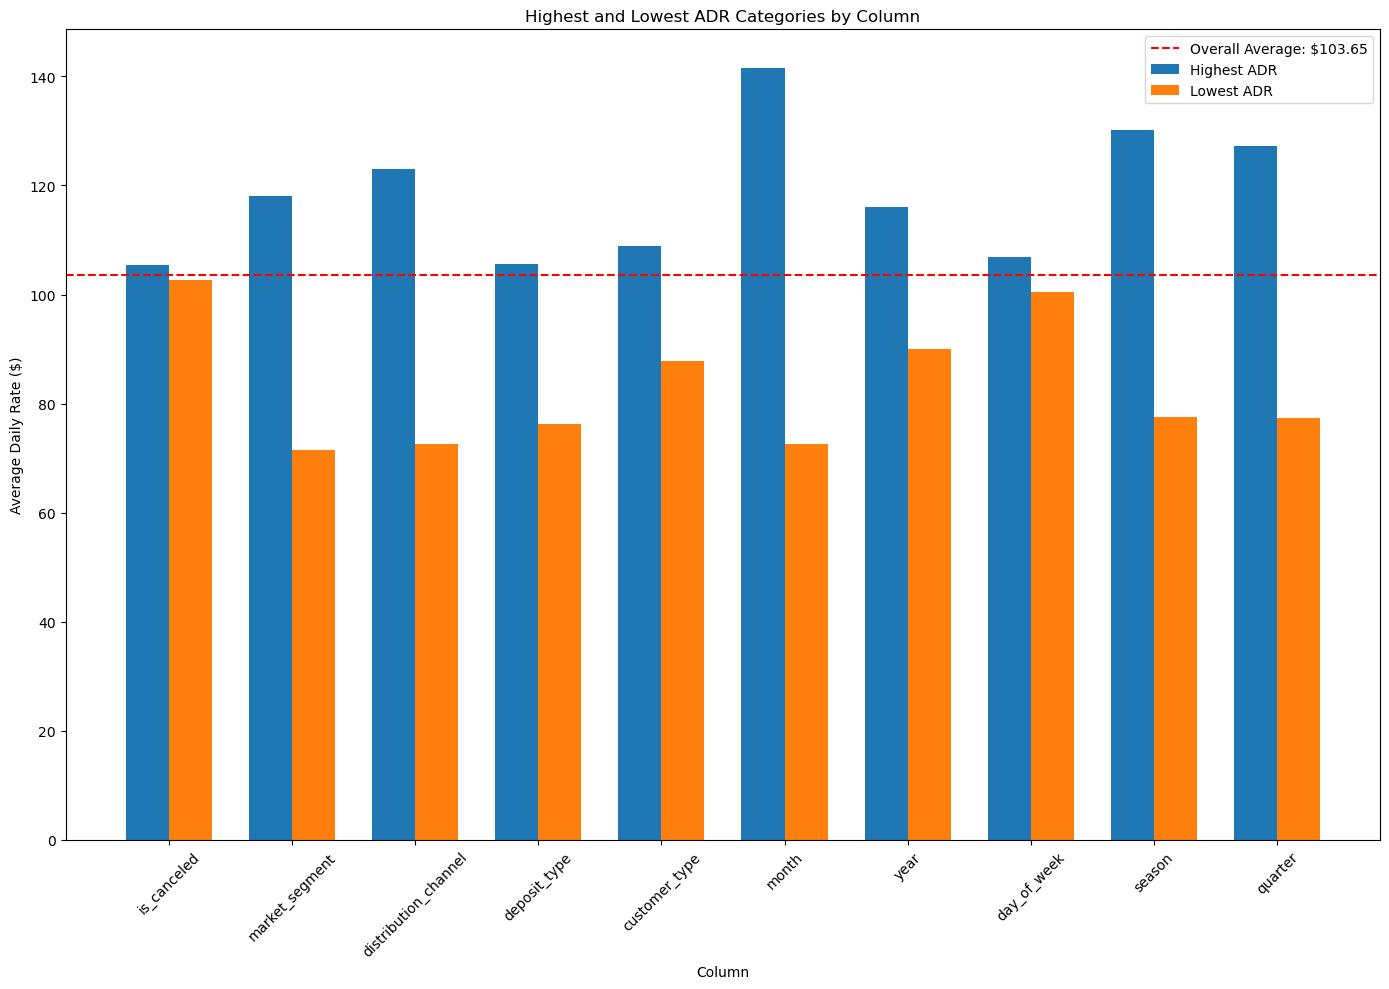


=== COMPREHENSIVE ACTION PLAN ===
Based on the analysis of ADR across multiple categories, here is a comprehensive action plan:

1. month Strategy:
   - Finding: August has $141.54 ADR vs. January with $72.57 ADR
   - Action: Implement seasonal pricing: increase rates during August and offer promotions during January to boost occupancy

2. season Strategy:
   - Finding: Summer has $130.19 ADR vs. Winter with $77.52 ADR
   - Action: Implement seasonal pricing strategy with higher rates during Summer and special offers during Winter

3. distribution_channel Strategy:
   - Finding: GDS has $123.0 ADR vs. Corporate with $72.59 ADR
   - Action: Focus marketing efforts on GDS channel; negotiate better rates or reduce dependency on Corporate

4. quarter Strategy:
   - Finding: 3 has $127.15 ADR vs. 1 with $77.36 ADR
   - Action: Develop quarterly business strategies with focused marketing during 1 to boost occupancy

5. market_segment Strategy:
   - Finding: Direct has $118.11 ADR vs. Corpor

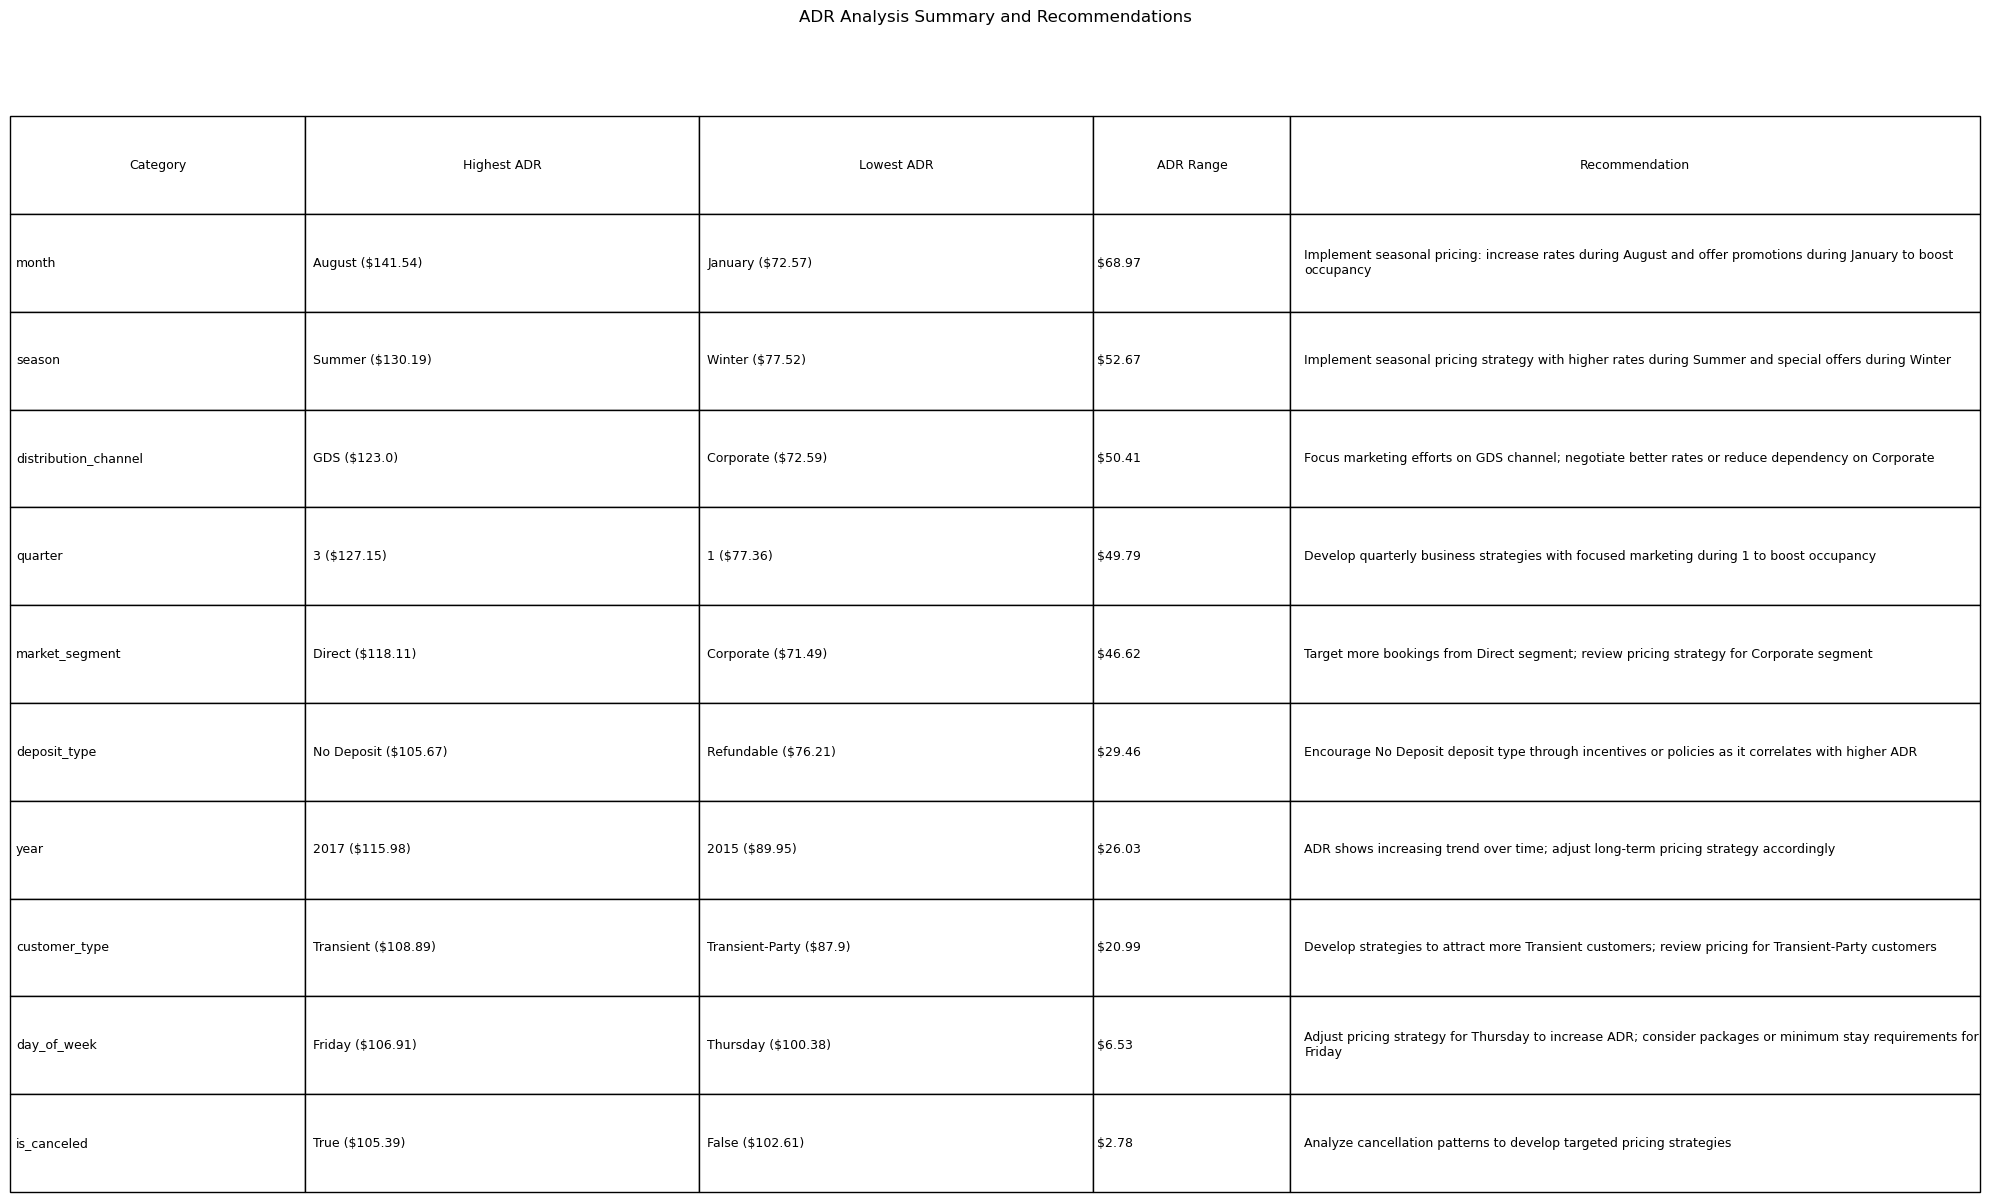

,Category,Highest ADR,Lowest ADR,ADR Range,Recommendation
1,MONTH,August ($141.54),January ($72.57),$68.97,Implement seasonal pricing: increase rates during August and offer promotions during January to boost occupancy
2,SEASON,Summer ($130.19),Winter ($77.52),$52.67,Implement seasonal pricing strategy with higher rates during Summer and special offers during Winter
3,DISTRIBUTION_CHANNEL,GDS ($123.00),Corporate ($72.59),$50.41,Focus marketing efforts on GDS channel; negotiate better rates or reduce dependency on Corporate
4,QUARTER,3 ($127.15),1 ($77.36),$49.79,Develop quarterly business strategies with focused marketing during 1 to boost occupancy
5,MARKET_SEGMENT,Direct ($118.11),Corporate ($71.49),$46.62,Target more bookings from Direct segment; review pricing strategy for Corporate segment
6,DEPOSIT_TYPE,No Deposit ($105.67),Refundable ($76.21),$29.46,Encourage No Deposit deposit type through incentives or policies as it correlates with higher ADR
7,YEAR,2017 ($115.98),2015 ($89.95),$26.03,ADR shows increasing trend over time; adjust long-term pricing strategy accordingly
8,CUSTOMER_TYPE,Transient ($108.89),Transient-Party ($87.90),$20.99,Develop strategies to attract more Transient customers; review pricing for Transient-Party customers
9,DAY_OF_WEEK,Friday ($106.91),Thursday ($100.38),$6.53,Adjust pricing strategy for Thursday to increase ADR; consider packages or minimum stay requirements for Friday
10,IS_CANCELED,True ($105.39),False ($102.61),$2.78,Analyze cancellation patterns to develop targeted pricing strategies


In [24]:
# Comprehensive summary of ADR analysis for all columns
print("=== COMPREHENSIVE ADR ANALYSIS SUMMARY ===\n")

# Create a DataFrame to store summary statistics
summary_data = []

# Function to analyze each column and provide recommendations
def analyze_column_impact(column_name):
    # Group by the column and calculate mean ADR
    grouped = df.groupby(column_name)['adr'].agg(['mean', 'count', 'std']).round(2)
    
    # Sort by mean ADR
    sorted_by_adr = grouped.sort_values('mean')
    
    # Get lowest and highest categories (safely)
    if len(sorted_by_adr) > 0:
        lowest_category = sorted_by_adr.index[0]
        lowest_adr = sorted_by_adr['mean'].iloc[0]
        
        highest_category = sorted_by_adr.index[-1]
        highest_adr = sorted_by_adr['mean'].iloc[-1]
        
        # Calculate percentage difference from overall average
        lowest_diff = ((lowest_adr - overall_adr_avg) / overall_adr_avg * 100).round(2)
        highest_diff = ((highest_adr - overall_adr_avg) / overall_adr_avg * 100).round(2)
        
        # Calculate impact range
        impact_range = highest_adr - lowest_adr
    else:
        lowest_category = "N/A"
        highest_category = "N/A"
        lowest_adr = 0
        highest_adr = 0
        lowest_diff = 0
        highest_diff = 0
        impact_range = 0
    
    # Calculate percentage of total bookings for each category
    grouped['percentage'] = (grouped['count'] / grouped['count'].sum() * 100).round(2)
    
    # Find the most common category
    most_common = grouped['count'].idxmax() if len(grouped) > 0 else "N/A"
    most_common_pct = grouped.loc[most_common, 'percentage'] if most_common != "N/A" else 0
    
    # Generate specific recommendations based on column and findings
    if column_name == 'is_canceled':
        # Check if we can safely compare the values
        if 0 in grouped.index and 1 in grouped.index:
            if grouped.loc[0, 'mean'] > grouped.loc[1, 'mean']:
                recommendation = "Consider investigating why non-canceled bookings have higher ADR - may indicate pricing strategy is effective"
            else:
                recommendation = "Implement strategies to reduce cancellations, especially for high-value bookings"
        else:
            recommendation = "Analyze cancellation patterns to develop targeted pricing strategies"
            
    elif column_name == 'month':
        recommendation = f"Implement seasonal pricing: increase rates during {highest_category} and offer promotions during {lowest_category} to boost occupancy"
            
    elif column_name == 'day_of_week':
        recommendation = f"Adjust pricing strategy for {lowest_category} to increase ADR; consider packages or minimum stay requirements for {highest_category}"
            
    elif column_name == 'market_segment':
        recommendation = f"Target more bookings from {highest_category} segment; review pricing strategy for {lowest_category} segment"
            
    elif column_name == 'distribution_channel':
        recommendation = f"Focus marketing efforts on {highest_category} channel; negotiate better rates or reduce dependency on {lowest_category}"
            
    elif column_name == 'deposit_type':
        recommendation = f"Encourage {highest_category} deposit type through incentives or policies as it correlates with higher ADR"
            
    elif column_name == 'customer_type':
        recommendation = f"Develop strategies to attract more {highest_category} customers; review pricing for {lowest_category} customers"
            
    elif column_name == 'year':
        years_list = sorted(grouped.index)
        if len(years_list) >= 2:
            latest_year = years_list[-1]
            earliest_year = years_list[0]
            year_trend = "increasing" if grouped.loc[latest_year, 'mean'] > grouped.loc[earliest_year, 'mean'] else "decreasing"
            recommendation = f"ADR shows {year_trend} trend over time; adjust long-term pricing strategy accordingly"
        else:
            recommendation = "Insufficient year data for trend analysis"
            
    elif column_name == 'season':
        recommendation = f"Implement seasonal pricing strategy with higher rates during {highest_category} and special offers during {lowest_category}"
            
    elif column_name == 'quarter':
        recommendation = f"Develop quarterly business strategies with focused marketing during {lowest_category} to boost occupancy"
    else:
        recommendation = "Review pricing strategy based on category performance"
    
    # Summarize findings
    print(f"\n--- {column_name.upper()} ---")
    print(f"Lowest ADR: {lowest_category} (${lowest_adr}, {lowest_diff}% from average)")
    print(f"Highest ADR: {highest_category} (${highest_adr}, {highest_diff}% from average)")
    print(f"ADR Range: ${impact_range}")
    print(f"Most common: {most_common} ({most_common_pct}% of bookings)")
    print(f"Recommendation: {recommendation}")
    
    # Add to summary data
    summary_data.append({
        'Column': column_name,
        'Lowest_ADR_Category': lowest_category,
        'Lowest_ADR': lowest_adr,
        'Lowest_ADR_Pct': lowest_diff,
        'Highest_ADR_Category': highest_category,
        'Highest_ADR': highest_adr,
        'Highest_ADR_Pct': highest_diff,
        'ADR_Range': impact_range,
        'Most_Common': most_common,
        'Most_Common_Pct': most_common_pct,
        'Recommendation': recommendation
    })
    
    # Return data for detailed visualization
    return grouped

# Analyze all columns
all_columns = standard_columns + time_columns
column_data = {}

for column in all_columns:
    column_data[column] = analyze_column_impact(column)

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Create a visualization summary of highest and lowest categories for each column
plt.figure(figsize=(14, 10))
plt.title('Highest and Lowest ADR Categories by Column')

# Prepare data for plotting
columns = summary_df['Column']
highest_adr = summary_df['Highest_ADR']
lowest_adr = summary_df['Lowest_ADR']

# Set up bar positions
x = np.arange(len(columns))
width = 0.35

# Plot bars
plt.bar(x - width/2, highest_adr, width, label='Highest ADR')
plt.bar(x + width/2, lowest_adr, width, label='Lowest ADR')

# Add labels and formatting
plt.xlabel('Column')
plt.ylabel('Average Daily Rate ($)')
plt.xticks(x, columns, rotation=45)
plt.axhline(y=overall_adr_avg, color='r', linestyle='--', label=f'Overall Average: ${overall_adr_avg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Create a comprehensive action plan based on all findings
print("\n=== COMPREHENSIVE ACTION PLAN ===")
print("Based on the analysis of ADR across multiple categories, here is a comprehensive action plan:")

# Sort by ADR impact range to prioritize actions
summary_df = summary_df.sort_values('ADR_Range', ascending=False)

for i, row in enumerate(summary_df.iterrows()):
    idx, row_data = row
    print(f"\n{i+1}. {row_data['Column']} Strategy:")
    print(f"   - Finding: {row_data['Highest_ADR_Category']} has ${row_data['Highest_ADR']} ADR vs. {row_data['Lowest_ADR_Category']} with ${row_data['Lowest_ADR']} ADR")
    print(f"   - Action: {row_data['Recommendation']}")

# Create table visualization of recommendations
plt.figure(figsize=(20, 12))  # Increased figure size
plt.axis('off')
table_data = []
table_columns = ['Category', 'Highest ADR', 'Lowest ADR', 'ADR Range', 'Recommendation']

for idx, row in summary_df.iterrows():
    table_data.append([
        row['Column'],
        f"{row['Highest_ADR_Category']} (${row['Highest_ADR']})",
        f"{row['Lowest_ADR_Category']} (${row['Lowest_ADR']})",
        f"${row['ADR_Range']:.2f}",
        row['Recommendation']
    ])

# Create the table with adjusted parameters
table = plt.table(
    cellText=table_data,
    colLabels=table_columns,
    cellLoc='left',  # Align text to the left
    loc='center',
    bbox=[0, 0, 1, 1],
    colWidths=[0.15, 0.2, 0.2, 0.1, 0.35]  # Adjust column widths
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(9)  # Slightly smaller font size
table.scale(1.2, 2)  # Increased row height

# Auto-wrap text in cells
for cell in table._cells:
    table._cells[cell].set_text_props(wrap=True)
    table._cells[cell].set_height(0.1)  # Increased cell height
    
    # Add padding to cells
    table._cells[cell].PAD = 0.02

plt.title('ADR Analysis Summary and Recommendations', y=1.08)
plt.tight_layout()
plt.show()

# Create a more detailed DataFrame for display
detailed_recommendations = pd.DataFrame({
    'Category': sorted_recommendations['Column'].str.upper(),
    'Highest ADR': sorted_recommendations.apply(lambda x: f"{x['Highest_ADR_Category']} (${x['Highest_ADR']:.2f})", axis=1),
    'Lowest ADR': sorted_recommendations.apply(lambda x: f"{x['Lowest_ADR_Category']} (${x['Lowest_ADR']:.2f})", axis=1),
    'ADR Range': sorted_recommendations['ADR_Range'].apply(lambda x: f"${x:.2f}"),
    'Recommendation': sorted_recommendations['Recommendation']
})

# Reset index to show row numbers starting from 1
detailed_recommendations.index = range(1, len(detailed_recommendations) + 1)

# Display the table with styling
from IPython.display import display, HTML

# Apply styling to the DataFrame
styled_df = detailed_recommendations.style\
    .set_properties(**{
        'background-color': '#000000',  # Black background
        'color': '#ffffff',  # White text
        'border-color': '#333333',
        'border-style': 'solid',
        'border-width': '1px',
        'padding': '10px',
        'text-align': 'left'
    })\
    .set_table_styles([
        {'selector': 'th',  # Headers stay the same
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('padding', '10px'),
                  ('text-align', 'left')]},
        {'selector': 'tr:hover',
         'props': [('background-color', '#1a1a1a')]},  # Darker gray on hover
    ])\
    .set_caption('Detailed ADR Analysis and Recommendations')

# Display the styled table
display(styled_df)

## Conclusions summary : 

* Implement seasonal pricing: increase rates during August and offer promotions during January to boost occupancy.

* Focus marketing efforts on GDS channel (Travel agencies and Touroperatos); negotiate better rates, and possibly avoid coporate contracts or increase pricing for this ones if it is a obligation in the contract.

* Target more bookings from the Direct segment avoiding dependency on Travel Agents on Touroperators, since Direct bookings provide a much higher revenue: Marketing strategies, advertising etc... 

* Control pricing on Refundable, the cancellation rate on this is under the average cancellation average (22% vds 37%) but the pricing for refundable bookings should be higher and removed from bookings for high season (Summer).

* Adjust pricing strategy for Thursday to increase ADR; Consider packages or minimum stay requirements for Friday, to boost the weekend as a whole. The price variations in the City Hotel specially could be adapted to the different seasons. 


